# Predictive Analytics

In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Support Vector Machine

Support Vector Machine (SVM) is a supervised learning model with associated learning algorithms that analyse data used for classification and regression analysis. SVM is highly preferred by many as it produces significant accuracy with less computation power. Although it can be used for both classification and regression analysis, SVM is widely used for classification objectives. 
 
The objective of SVM is to find a hyperplane in an N-dimensional space (N = number of features) that classifies the datapoints. Hyperplanes are decision boundaries that help classify data points. Data points falling on one side of the hyperplane can be attributed as a certain class.

## Importing data using Pandas

In [2]:
df_full_weekly = pd.read_csv('Data/3.Data Preparation/df_full_weekly.csv')
df_full_weekly.drop(df_full_weekly.columns[0], axis=1, inplace=True)

df_full_weekly = df_full_weekly.astype('float')
df_full_weekly.head()

,delivery,consumption,T,SQ,Q,N,week,month,season,heating_sys,no_people,no_solar_panels,sp_group
0,91.363,35.031,16.282517,2.041958,68.468531,6.657343,28.0,7.0,2.0,1.0,4.0,17.0,3.0
1,155.805,25.393,18.701190,3.732143,88.041667,5.446429,29.0,7.0,2.0,1.0,4.0,17.0,3.0
2,115.273,12.460,17.673506,2.405493,72.859451,7.172859,30.0,7.0,2.0,1.0,4.0,17.0,3.0
3,23.200,2.087,17.550000,3.958333,89.333333,6.958333,31.0,7.0,2.0,1.0,4.0,17.0,3.0
4,124.050,13.106,17.240972,2.923611,77.013889,5.847222,31.0,8.0,2.0,1.0,4.0,17.0,3.0


### Weekly dataset
#### Predicting the heating system

First of all, we divide the dataset into the X features and the target feature.

In [3]:
features = df_full_weekly.columns[:-4]
target_feature = 'heating_sys'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In order to create the model, we use a Pipeline, which allows us to set what we want to use inside it.

In order to normalize the data, we use the StandarScaler library, which standardize features by removing the mean and scaling to unit variance. The standard score of a sample $x$ is calculated as: $z = (x - u) / s$, where $u$ is the mean of the training samples, and s is the standard deviation of the training samples.

In this case, we use Support Vector Machine. One of the features of the pipeline is that we are able to select different values for the model parameters. The pipeline will execute all the different possibilities and give us the best one. For this model, we will set the following parameters:
* **C:** Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
* **gamma:** Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

In [4]:
steps = [('scaler', StandardScaler()),
        ('svm', SVC())]

pipeline = Pipeline(steps)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10],
              'svm__gamma' : [0.001, 0.01, 0.1, 1]}

svm_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
svm_clf.fit(X, y)

score_weekly_hs = svm_clf.best_score_

display(svm_clf.best_estimator_)
display('Score: ' + str(svm_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

'Score: 0.632251720747296'

#### Predicting the nº of people

In [5]:
features = df_full_weekly.columns[:-4]
target_feature = 'no_people'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In [6]:
steps = [('scaler', StandardScaler()),
        ('svm', SVC())]

pipeline = Pipeline(steps)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10],
              'svm__gamma' : [0.001, 0.01, 0.1, 1]}

svm_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
svm_clf.fit(X, y)

score_weekly_pe = svm_clf.best_score_

display(svm_clf.best_estimator_)
display('Score: ' + str(svm_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

'Score: 0.421501147164864'

#### Predicting the nº of solar panels

In [7]:
features = df_full_weekly.columns[:-4]
target_feature = 'sp_group'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In [8]:
steps = [('scaler', StandardScaler()),
        ('svm', SVC())]

pipeline = Pipeline(steps)

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10],
              'svm__gamma' : [0.001, 0.01, 0.1, 1]}

svm_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
svm_clf.fit(X, y)

score_weekly_sp = svm_clf.best_score_

display(svm_clf.best_estimator_)
display('Score: ' + str(svm_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

'Score: 0.5575221238938053'

## Model scores

In [9]:
svm_scores = pd.DataFrame({'target': ['Heating system', 'Nº of people', 'Nº of solar panels'],
                          'score': [score_weekly_hs, score_weekly_pe, score_weekly_sp]})

Text(0.5, 0, 'Target')

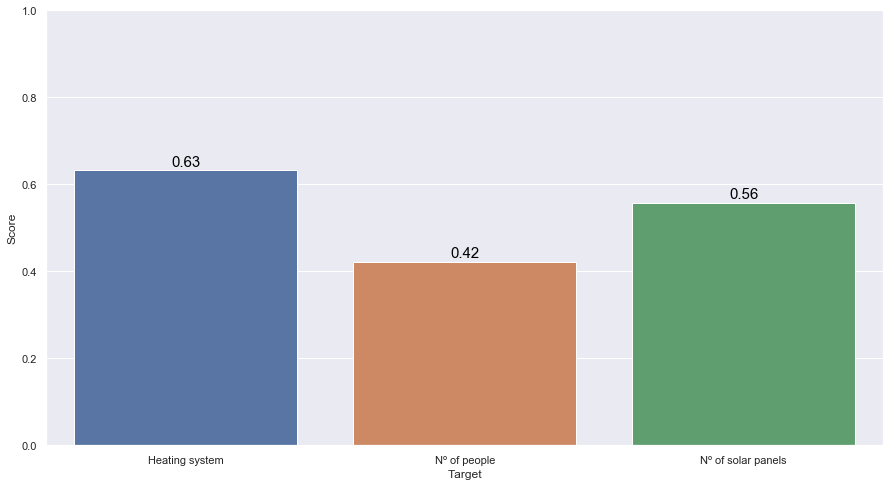

In [10]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x="target", y="score", data=svm_scores)

for index, row in svm_scores.iterrows():
    ax.text(index, (row.score + 0.01), round(row.score, 2), color='black', ha="center", fontsize=15)

ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Target')